**Import Libraries and Data**

In [2]:

import types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_021037e57f314a96ba456b41ff50196c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='trKTOQgLCuC2zyHj69iqvTayv3qRcaHPnmv3KfPhD9Lr',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_021037e57f314a96ba456b41ff50196c.get_object(Bucket='datascienceprojects-donotdelete-pr-h3n6mcwhewbbma',Key='datasets_13720_18513_insurance.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape

(1338, 7)

In [4]:
data.dropna(inplace=True)

In [5]:
data.shape

(1338, 7)

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
data.region.value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

**Univariate Analysis**

Text(0, 0.5, 'counts')

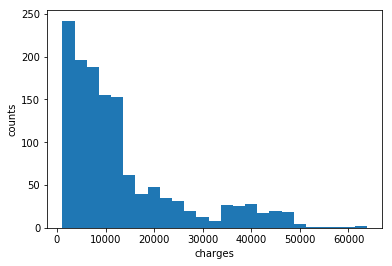

In [9]:
#Visualization of target variable (charges)
plt.hist(x=data.charges,bins=25)
plt.xlabel('charges')
plt.ylabel('counts')

Text(0, 0.5, 'counts')

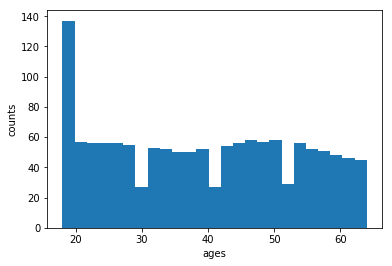

In [10]:
#visualizing explanatory variables
plt.hist(x=data.age,bins=25)
plt.xlabel('ages')
plt.ylabel('counts')

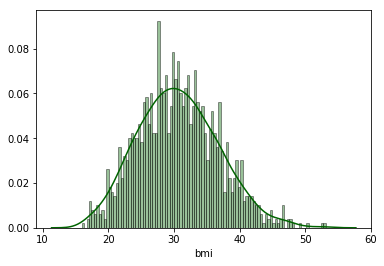

In [11]:
sns.distplot(data['bmi'],hist = True, color = 'darkgreen', bins = 100, hist_kws={'edgecolor':'black'})

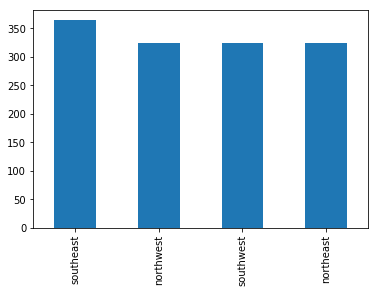

In [12]:
data['region'].value_counts().plot.bar()

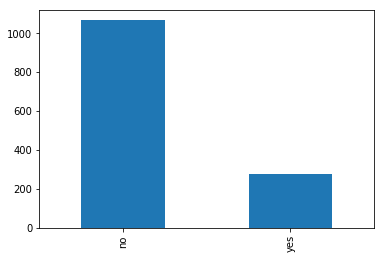

In [13]:
data['smoker'].value_counts().plot.bar()

Text(0, 0.5, 'counts')

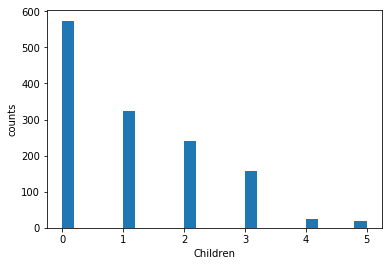

In [14]:
plt.hist(x=data.children,bins=25)
plt.xlabel('Children')
plt.ylabel('counts')

**Bivariate Analysis**

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'charges')

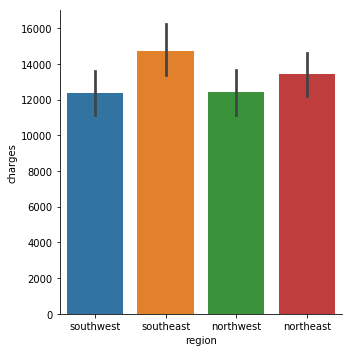

In [15]:
sns.factorplot(x='region',y='charges',data=data,kind='bar')
plt.xlabel('region')
plt.ylabel('charges')

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.825000000000003, 0.5, 'charges')

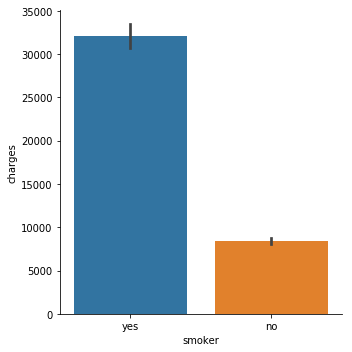

In [16]:
sns.factorplot(x='smoker',y='charges',data=data,kind='bar')
plt.xlabel('smoker')
plt.ylabel('charges')

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(-8.950000000000003, 0.5, 'charges')

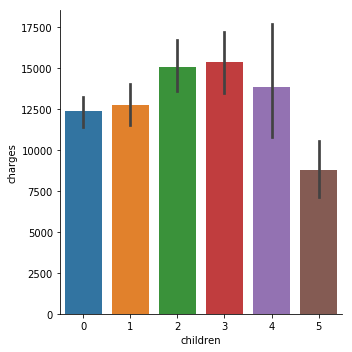

In [17]:
sns.factorplot(x='children',y='charges',data=data,kind='bar')
plt.xlabel('children')
plt.ylabel('charges')

Text(0, 0.5, 'charges')

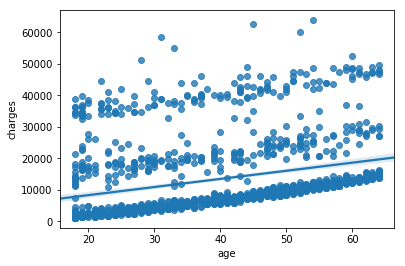

In [18]:
scat=sns.regplot(x='age',y='charges',data=data)
plt.xlabel('age')
plt.ylabel('charges')

**Feature Engineering**

In [19]:
#Log transforming the skew variables
num_cols=data.select_dtypes('number').columns
skew_limit=0.75
skew_values=data.skew()

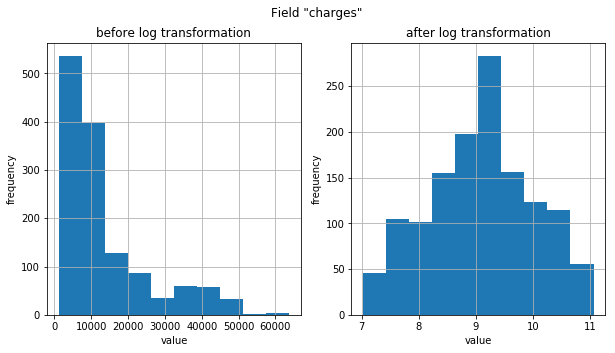

In [20]:
field='charges'
fig,(ax_before,ax_after)=plt.subplots(1,2, figsize=(10,5))
data[field].hist(ax=ax_before)
data[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before log transformation',ylabel='frequency',xlabel='value')
ax_after.set(title='after log transformation',ylabel='frequency',xlabel='value')
fig.suptitle('Field "{}"'.format(field));

In [21]:
data['charges']=data['charges'].apply(np.log1p)

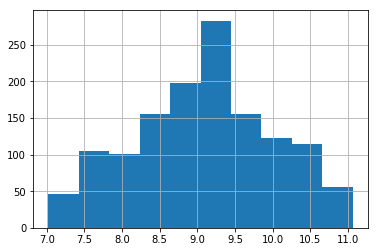

In [22]:
data['charges'].hist()

Text(0, 0.5, 'charges')

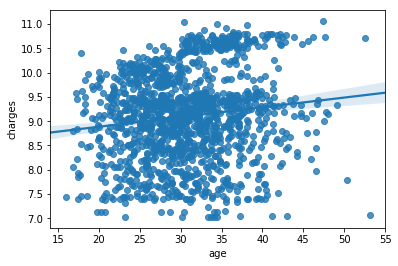

In [23]:
scat=sns.regplot(x='bmi',y='charges',data=data)
plt.xlabel('age')
plt.ylabel('charges')

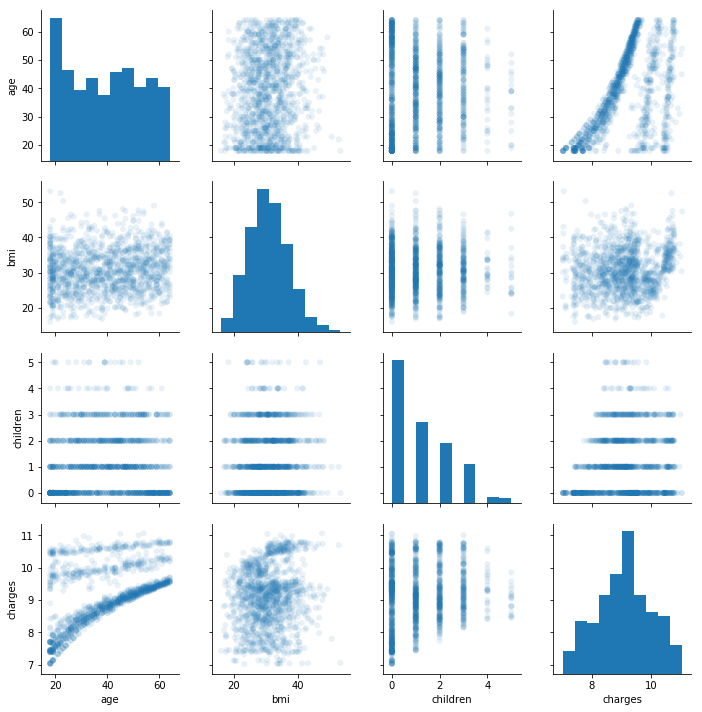

In [24]:
#Pair plots of features
sns.pairplot(data,plot_kws=dict(alpha=.1,edgecolor='none'))

**Encoding categorical variables**

In [25]:
#convert categorical variables with 2 levels to binary variables
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])

In [26]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455


**Hypothesis Testing**

In [27]:
#association between categorical explanatory variables and target variable
#ANOVA
import statsmodels.formula.api as snf

In [28]:
model1=snf.ols(formula='charges ~ sex', data=data)
result1=model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.04256
Date:                Tue, 08 Sep 2020   Prob (F-statistic):              0.837
Time:                        17:38:53   Log-Likelihood:                -1785.6
No. Observations:                1338   AIC:                             3575.
Df Residuals:                    1336   BIC:                             3585.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0936      0.036    254.398      0.0

p-value for association between 'sex' and 'charges' is 0.837 > 0.05, so it is insignificant. We cannot reject null hypothesis for this case.

In [29]:
model2=snf.ols(formula='charges ~ smoker', data=data)
result2=model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     1062.
Date:                Tue, 08 Sep 2020   Prob (F-statistic):          5.98e-172
Time:                        17:38:54   Log-Likelihood:                -1394.1
No. Observations:                1338   AIC:                             2792.
Df Residuals:                    1336   BIC:                             2803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7884      0.021    417.614      0.0

p-value is very very small < 0.05, so we can reject the null hypothesis and move forward with the assumption that there is a relation between the two variables

In [30]:
#post-hoc test for categorical variables with more than 2 levels
import statsmodels.stats.multicomp as multi

In [31]:
mc1=multi.MultiComparison(data['charges'], data['region'])
res1=mc1.tukeyhsd()
print(res1.summary())

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  0      1     -0.099  -0.2846 0.0866 False 
  0      2    -0.0463  -0.2269 0.1342 False 
  0      3    -0.1376  -0.3232 0.0479 False 
  1      2     0.0527  -0.1277 0.2331 False 
  1      3    -0.0386  -0.2241 0.1468 False 
  2      3    -0.0913  -0.2717 0.0891 False 
--------------------------------------------


The above results show that we cannot reject the null hypothesis for any of the groups. 

In [32]:
#Pearson correlation between continuous explanatory variables and target variable
import scipy.stats
print('association between continuous explanatory variables and target variable')
print('1. Age and Charges')
print(scipy.stats.pearsonr(data['age'],data['charges']))
print('1. BMI and Charges')
print(scipy.stats.pearsonr(data['bmi'],data['charges']))
print('1. Children and Charges')
print(scipy.stats.pearsonr(data['children'],data['charges']))

association between continuous explanatory variables and target variable
1. Age and Charges
(0.527807363459784, 7.675383914743264e-97)
1. BMI and Charges
(0.13267798192830776, 1.1148799774752429e-06)
1. Children and Charges
(0.16131660389394725, 2.9539064053854775e-09)


We can see above that there is a correlation between the given continuous variables and the target variable, so we can reject the null hypothesis.


**After analysing all the variables we can clearly say that 'sex' and 'region' have no clear correlation with the target variable 'charges'. So we can remove these variables from our data set.**

In [33]:
final_data= data[['age','smoker','bmi','children','charges']]

In [34]:
final_data.head()

,age,smoker,bmi,children,charges
0,19,1,27.900,0,9.734236
1,18,0,33.770,1,7.453882
2,28,0,33.000,3,8.400763
3,33,0,22.705,0,9.998137
4,32,0,28.880,0,8.260455


**Regression Analysis**

In [35]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures)

In [36]:
lr=LinearRegression()

In [37]:
X=final_data[['age','smoker','bmi','children']]
y=final_data['charges']

In [38]:
X.head()

,age,smoker,bmi,children
0,19,1,27.900,0
1,18,0,33.770,1
2,28,0,33.000,3
3,33,0,22.705,0
4,32,0,28.880,0


In [39]:
y.head()

0    9.734236
1    7.453882
2    8.400763
3    9.998137
4    8.260455
Name: charges, dtype: float64

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [41]:
X_train.shape

(936, 4)

In [42]:
y_train.shape

(936,)

In [43]:
X_test.shape

(402, 4)

In [44]:
y_test.shape

(402,)

In [45]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred[0:5]

array([8.82167689, 8.25530661, 8.30804311, 8.66784491, 9.37933152])

In [46]:
print(y_pred[0:5],y_test[0:5])

[8.82167689 8.25530661 8.30804311 8.66784491 9.37933152] 395     8.926346
809     8.104943
324     7.961053
237     8.403846
1132    9.938373
Name: charges, dtype: float64


In [47]:
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred- y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred- y_test) ** 2))
print("R2-score: %.2f" % r2_score( y_pred, y_test) )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.17
R2-score: 0.75


In [48]:
print('Variance score: %.2f' % lr.score(X, y))

Variance score: 0.76


In [49]:
print ('Coefficients: ', lr.coef_)

Coefficients:  [0.03408005 1.57597449 0.00894855 0.09575372]


[(0, 11.002473087705761),
 Text(0, 0.5, 'predicted charges'),
 (0, 11.002473087705761),
 Text(0.5, 0, 'actual charges'),
 Text(0.5, 1.0, 'linear regression results')]

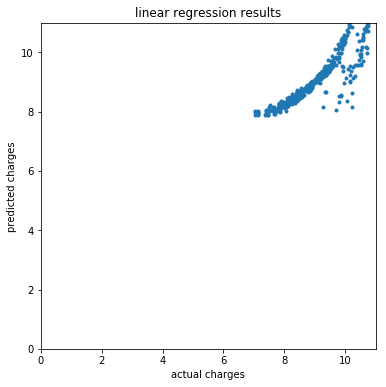

In [50]:
f=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.plot(y_test,y_pred,marker='o',ls='',ms=3.0)
lim=(0,y_test.max())
ax.set(xlabel='actual charges',
      ylabel='predicted charges',
      xlim=lim,
      ylim=lim,
      title='linear regression results')

In [51]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
train_x = np.asanyarray(X_train)
train_y = np.asanyarray(y_train)

test_x = np.asanyarray(X_test)
test_y = np.asanyarray(y_test)

lr2=LinearRegression()
poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly


array([[1.00000000e+00, 4.10000000e+01, 1.00000000e+00, ...,
        1.27806250e+03, 3.57500000e+01, 1.00000000e+00],
       [1.00000000e+00, 2.50000000e+01, 0.00000000e+00, ...,
        5.06925225e+02, 2.25150000e+01, 1.00000000e+00],
       [1.00000000e+00, 5.70000000e+01, 0.00000000e+00, ...,
        7.89610000e+02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 3.50000000e+01, 0.00000000e+00, ...,
        1.57688410e+03, 1.58840000e+02, 1.60000000e+01],
       [1.00000000e+00, 1.90000000e+01, 0.00000000e+00, ...,
        1.25316000e+03, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 2.00000000e+01, 0.00000000e+00, ...,
        9.89731600e+02, 0.00000000e+00, 0.00000000e+00]])

In [52]:
lr2.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', lr.coef_)
print ('Intercept: ',lr.intercept_)

Coefficients:  [0.03408005 1.57597449 0.00894855 0.09575372]
Intercept:  7.076321160791153


In [53]:
#Evaluating 
test_x_poly = poly.fit_transform(test_x)
y_predict= lr2.predict(test_x_poly)
print(y_predict[0:5],test_y[0:5])
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predict- test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predict- test_y) ** 2))
print("R2-score: %.2f" % r2_score( y_predict, test_y) )

[8.92142857 8.25197786 8.24146271 8.61847518 9.38720765] [8.92634569 8.1049429  7.96105321 8.40384645 9.93837294]
Mean absolute error: 0.20
Residual sum of squares (MSE): 0.12
R2-score: 0.83


[(0, 11.002473087705761),
 Text(0, 0.5, 'predicted charges'),
 (0, 11.002473087705761),
 Text(0.5, 0, 'actual charges'),
 Text(0.5, 1.0, 'polynomial regression results')]

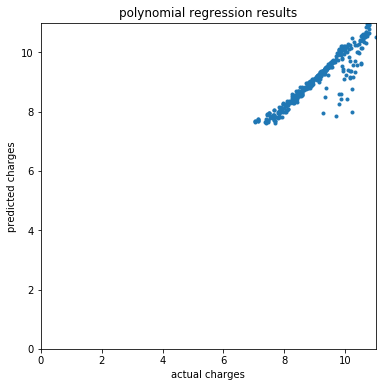

In [53]:
f2=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.plot(test_y,y_predict,marker='o',ls='',ms=3.0)
lim=(0,test_y.max())
ax.set(xlabel='actual charges',
      ylabel='predicted charges',
      xlim=lim,
      ylim=lim,
      title='polynomial regression results')

In [55]:
#Ridge regression
from sklearn.linear_model import RidgeCV
alphas=[0.005,0.5,0.1,0.3,1,3,5,10,15,30,80]
ridgeCV=RidgeCV(alphas=alphas,cv=3).fit(X_train,y_train)
y_predictions=ridgeCV.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_predictions- y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_predictions- y_test) ** 2))
print("R2-score: %.2f" % r2_score( y_predictions, y_test) )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.17
R2-score: 0.75


[(0, 11.002473087705761),
 Text(0, 0.5, 'predicted charges'),
 (0, 11.002473087705761),
 Text(0.5, 0, 'actual charges'),
 Text(0.5, 1.0, 'ridge regression results')]

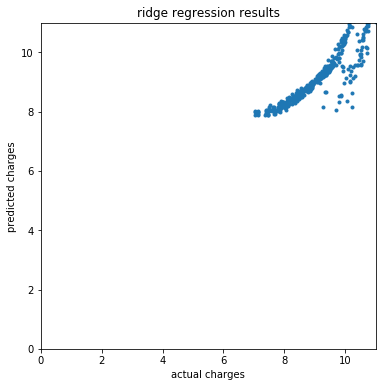

In [59]:
f3=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.plot(y_test,y_predictions,marker='o',ls='',ms=3.0)
lim=(0,y_test.max())
ax.set(xlabel='actual charges',
      ylabel='predicted charges',
      xlim=lim,
      ylim=lim,
      title='ridge regression results')

In [57]:
#Lasso Regression
from sklearn.linear_model import LassoCV
alphas2=np.array([0.005,0.05,0.1,1,5,20,50,80,100,120,140])
lassoCV=LassoCV(alphas=alphas2,max_iter=5e4,cv=3).fit(X_train,y_train)
y_p=lassoCV.predict(X_test)
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_p- y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_p- y_test) ** 2))
print("R2-score: %.2f" % r2_score( y_p, y_test) )

Mean absolute error: 0.27
Residual sum of squares (MSE): 0.17
R2-score: 0.74


[(0, 11.002473087705761),
 Text(0, 0.5, 'predicted charges'),
 (0, 11.002473087705761),
 Text(0.5, 0, 'actual charges'),
 Text(0.5, 1.0, 'lasso regression results')]

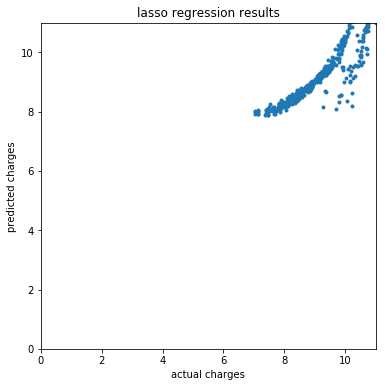

In [58]:
f4=plt.figure(figsize=(6,6))
ax=plt.axes()
ax.plot(y_test,y_p,marker='o',ls='',ms=3.0)
lim=(0,y_test.max())
ax.set(xlabel='actual charges',
      ylabel='predicted charges',
      xlim=lim,
      ylim=lim,
      title='lasso regression results')

**Cross-Validation**

In [61]:
from sklearn.model_selection import KFold,cross_val_predict
from sklearn.pipeline import Pipeline

In [63]:
#for linear regression
kf=KFold(shuffle=True,random_state=1234,n_splits=3)

In [64]:
from sklearn.metrics import mean_squared_error

In [65]:
scores=[]
lr3=LinearRegression()
for train_index,test_index in kf.split(X):
    trainx,testx,trainy,testy=(X.iloc[train_index,:],
                              X.iloc[test_index,:],
                              y[train_index],
                              y[test_index])
    lr3.fit(trainx,trainy)
    y_pr=lr3.predict(testx)
    score=r2_score(testy.values,y_pr)
    scores.append(score)
scores

[0.7854560153775929, 0.7687688877577215, 0.7198963632889281]

In [66]:
#for Polynomial Regression
scores=[]
lr4=LinearRegression()
poly2 = PolynomialFeatures(degree=2)
for train_index,test_index in kf.split(X):
    trainx,testx,trainy,testy=(X.iloc[train_index,:],
                              X.iloc[test_index,:],
                              y[train_index],
                              y[test_index])
    train_x_poly2 = poly2.fit_transform(trainx)
    lr4.fit(train_x_poly2,trainy)
    test_x_poly2 = poly2.fit_transform(testx)
    y_pr2=lr4.predict(test_x_poly2)
    score=r2_score(testy.values,y_pr2)
    scores.append(score)
scores

[0.8474777101848137, 0.8516935010536314, 0.782415633049339]

As per the outputs, Polynomial regression has the highest values for r2 score and lowest mean square error, so we can say that it is the best model for our given data set